## plot Trait Space

In [1]:
import traits_db
from scipy import stats as scistats
import matplotlib.pyplot as plt
import cmocean
import numpy as np
from itertools import product
import os

In [2]:
def attrs_label(attrs): 
    """generate a label from long_name and units"""
    return f'{attrs["long_name"]} [{attrs["units"]}]'

In [3]:
df = traits_db.df_mi
df

,Species,Phylum,Ao,Ac,Eo
0,Acanthephyra acutifrons,Crustacea,26.809651,13.364732,-0.0278
1,Acanthephyra curtirostris,Crustacea,25.575448,14.364194,0.0380
2,Acanthephyra purpurea,Crustacea,23.310023,7.460879,0.1320
3,Acanthephyra smithi,Crustacea,28.985507,17.657939,-0.0301
5,Acipenser brevirostrum,Chordata,22.123894,4.901716,0.3626
...,...,...,...,...,...
178,Styela plicata,Tunicata,6.215040,4.408143,-0.1910
179,Systellaspis debilis,Crustacea,22.222222,9.728667,0.2270
181,Tarletonbeania crenularis,Chordata,20.618557,5.241251,0.2133
182,Tautogolabrus adspersus,Chordata,17.301038,5.183987,0.2445


In [4]:
CommonName = list(df.Species.unique()).copy()

In [5]:
CommonName[0] = 'Sharp-nosed Deep-sea Shrimp'
CommonName[1] = 'Peaked Shrimp'
CommonName[2] = 'Purple Deep-sea Shrimp'
CommonName[3] = 'Deep-sea Shrimp'
CommonName[4] = 'Shortnose Sturgeon'
CommonName[5] = 'Japanese Eel'
CommonName[6] = 'Mottled Twister'
CommonName[7] = 'Twister'
CommonName[8] = 'Chesapeake Blue Crab'
CommonName[9] = 'Atlantic Rock Crab'
CommonName[10] = 'European Green Crab'
CommonName[11] = 'Black Sea Bass'
CommonName[12] = 'Black-axil Chromis'
CommonName[13] = 'Pacific Oyster'
CommonName[14] = 'Lumpsucker'
CommonName[15] = 'Common Dentex'
CommonName[16] = 'Sheephead Bream'
CommonName[17] = 'Longfin Inshore Squid'
CommonName[18] = 'Humboldt Squid'
CommonName[19] = 'Deep-water Shrimp'
CommonName[20] = 'Atlantic Cod'
CommonName[21] = 'Greenland Cod'
CommonName[22] = 'Black Prince Copepod'
CommonName[23] = 'Valuable Blunt-tail Prawn'
CommonName[24] = 'Humpbacked Conch'
CommonName[25] = 'Blue-spotted Coral-goby'
CommonName[26] = 'Broad-barred Goby'
CommonName[27] = 'Reef-building Deep-water Coral'
CommonName[28] = 'Common Spider Crab'
CommonName[29] = 'Midwater Eelpout'
CommonName[30] = 'Striped Bass'
CommonName[31] = 'Chambered Nautilus'
CommonName[32] = 'Elegant Deep-sea Shrimp'
CommonName[33] = 'Large Red Deep-sea Shrimp'
CommonName[34] = 'Common Octopus'
CommonName[35] = 'Deep-sea Shrimp'
CommonName[36] = 'Standard Spiny-tailed Shrimp'
CommonName[37] = 'Daggerblade Grass Shrimp'
CommonName[38] = 'Common American Prawn'
CommonName[39] = 'Northern Shrimp'
CommonName[40] = 'California Spot Prawn'
CommonName[41] = 'Western Rock Lobster'
CommonName[42] = 'California Spiny Lobster'
CommonName[43] = 'Summer Flounder'
CommonName[44] = 'Great Scallop'
CommonName[45] = 'Northern Brown Shrimp'
CommonName[46] = 'Whiteleg Shrimp'
CommonName[47] = 'Atlantic Salmon'
CommonName[48] = 'Common Salp'
CommonName[49] = 'Red Drum'
CommonName[50] = 'Small-spotted Catshark'
CommonName[51] = 'Common Cuttlefish'
CommonName[52] = 'Pelagic Shrimp'
CommonName[53] = 'Shrimp'
CommonName[54] = 'Ocean Sergestid'
CommonName[55] = 'Northern Lampfish'
CommonName[56] = 'Pleated Sea Squirt'
CommonName[57] = 'Feeble Spiny-tailed Shrimp'
CommonName[58] = 'Blue Lanternfish'
CommonName[59] = 'Cunner'
CommonName[60] = 'European Eelpout'

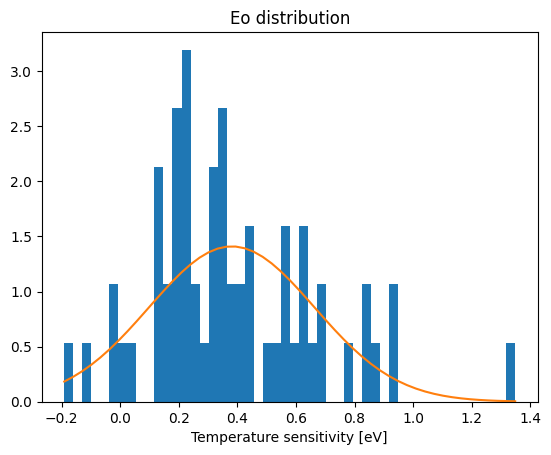

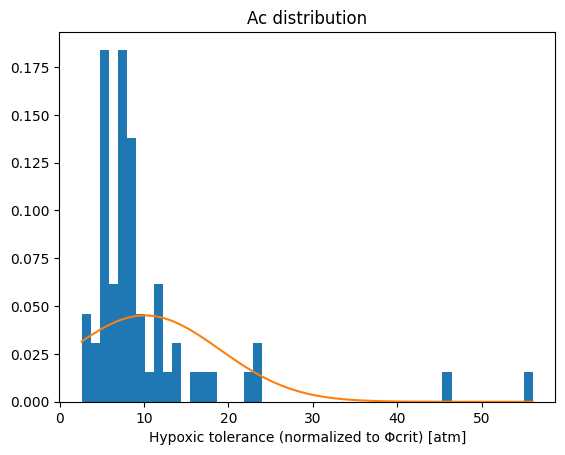

In [6]:
for vv in ['Eo', 'Ac']:
    fig, ax = plt.subplots()

    beta = scistats.norm.fit(df[vv].values)

    n, bins, h = ax.hist(df[vv].values, 50, density=True)
    pdf_fitted = scistats.norm.pdf(bins, *beta)
    ax.plot(bins, pdf_fitted)
    ax.set_title('%s distribution' % vv)
    ax.set_xlabel(attrs_label(df[vv].attrs))
plt.show()

In [7]:
def scatter_hist(df, varx, vary, ax, ax_histx, ax_histy):
    x = df[varx]
    kPa_per_atm = 101.325
    y = df[vary]#/kPa_per_atm
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    #
    beta = scistats.norm.fit(x.values)
    n, xbins, h = ax_histx.hist(x.values, 50, density=True, color='gray', edgecolor='k')
    xpdf_fitted = scistats.norm.pdf(xbins, *beta)
    ax_histx.plot(xbins, xpdf_fitted, color='green')
    max_x = 0.4
    #
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Times"]})
    ax_histx.set_ylim(0, 3.5)
    beta = scistats.norm.fit(y.values)
    n, ybins, h = ax_histy.hist(y.values, 50, density=True, color='gray', edgecolor='k', orientation='horizontal')#, bins=bins)
    ypdf_fitted = scistats.norm.pdf(ybins, *beta)
    ax_histy.plot(ypdf_fitted, ybins, color='green')
    max_y = 10
    ax_histy.set_xlim(0, 0.20)
    # the scatter plot:
    markerorder = ["o", "v", "^", "<", ">", "s", "p", "P"]
    Phyla = list(df.Phylum.unique())
    #
    X, Y = np.meshgrid(xbins, ybins)
    Z1, Z2 = np.meshgrid(xpdf_fitted, ypdf_fitted)
    mx = np.max(Z1 * Z2)
    ax.contourf(X, Y, Z1 * Z2 / mx, cmap=cmocean.cm.tempo, levels=np.arange(0.00, 1.02, 0.01))
    #
    for i, phylum in enumerate(Phyla):
        ndx = df.Phylum == phylum
        ax.plot(x.loc[ndx],y.loc[ndx],linestyle='none',marker=markerorder[i],color='purple',markerfacecolor='none',label=phylum)
    #
    #xloc = list(x.unique())
    #yloc = list(y.unique())
    #for i in range(len(Name)):
    #    ax.text(xloc[i],yloc[i],CommonName[i],fontsize=7,rotation=30)
    #
    ax.plot(max_x, max_y, marker='*', color='tomato')
    print(max_x,max_y)
    #
    ax.set_xticks(np.arange(-0.2,1.3,0.2))
    ax.set_xticklabels([str(ii/10.) for ii in range(-2,13,2)])
    ax.set_yticks(np.arange(10,56,10))
    ax.set_yticklabels([str(ii) for ii in np.arange(10,56,10)])
    ax.grid(linestyle='dashed')
    ax_histx.grid(linestyle='dashed')
    ax_histy.grid(linestyle='dashed')
    #
    plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Times"]})
    legend = ax.legend(loc="upper center", ncol=2, framealpha=0.5)
    ax.set_xlabel('Temperature Sensitivity of Hypoxia Vulnerability (E$_0$) [eV]', fontsize=14, fontweight='bold')
    ax.set_ylabel('Normalized Hypoxic Tolerance (A$_c$) [atm$^{-1}$]', fontsize=14, fontweight='bold')
    ax_histx.text(-0.12, 3., 'E$_0$', fontsize=16, fontweight='bold')
    ax_histy.text(.16, 0.523*kPa_per_atm, 'A$_c$', fontsize=16, fontweight='bold')
    ax.text(-0.12, 0.523*kPa_per_atm, 'A$_c$-E$_0$', fontsize=16, fontweight='bold')
    ax.set_xlim(-.22, 1.4)
    ax.set_ylim(2, 57)
    ax_histx.set_xlim(-.22, 1.4)
    ax_histy.set_ylim(2, 57)

0.4 10


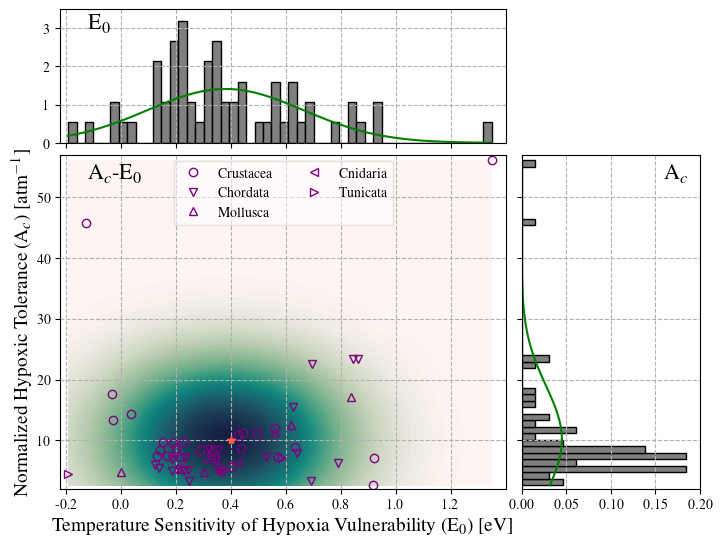

In [8]:
fig = plt.figure(figsize=[8, 6])
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Times"]})
# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(5, 2), height_ratios=(2, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(df, 'Eo', 'Ac', ax, ax_histx, ax_histy)
USER = os.environ['USER']
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/Supp_Figure1_Metabolic_trait_space_distribution.png'
plt.savefig(outfile, dpi=400)
plt.show()